In [1]:
# import necessary libraries
# import necessary libraries
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime
from numpy import datetime64
import seaborn as sns
import pprint

pp = pprint.PrettyPrinter(indent=4)

#### Scenario 1 - Money lending of fixed interest rate for unsecured purchase

In [2]:
# import data from csv files
# credit card rate
df_cc_rate = pd.read_csv('credit_card_rate.csv', parse_dates=['Date'], names=['Date', 'cc_rate'], skiprows=1)
# FICO score
df_fico = pd.read_csv('FICO_score.csv', parse_dates=['Date'], names=['Date', 'FICO'], skiprows=1)
# interest rate
df_interest = pd.read_csv('interest_rate.csv', parse_dates=['Date'], names=['Date', 'interest_rate'], skiprows=1)
# CPI
df_cpi = pd.read_csv('CPI.csv', parse_dates=['Date'], names=['Date', 'cpi'], skiprows=1)
# unemployment rate
df_unemployment = pd.read_csv('unemployment_rate.csv', parse_dates=['Date'], names=['Date', 'unemployment'], skiprows=1)
# capital ratio requirement
df_capital = pd.read_csv('capital_ratio.csv', parse_dates=['Date'], names=['Date', 'capital_ratio'], skiprows=1)

In [3]:
# data cleaning and outer merge datasets
df_cc_rate = df_cc_rate[df_cc_rate['cc_rate']!='.']
df_fico = df_fico[df_fico['FICO']!='.']
df_interest = df_interest[df_interest['interest_rate']!='.']
df_cpi = df_cpi[df_cpi['cpi']!='.']
df_unemployment = df_unemployment[df_unemployment['unemployment']!='.']
df_merge = df_cc_rate.merge(df_fico, left_on=['Date'], right_on=['Date'], how='outer')
df_merge = df_merge.merge(df_interest, left_on=['Date'], right_on=['Date'], how='outer')
df_merge = df_merge.merge(df_cpi, left_on=['Date'], right_on=['Date'], how='outer')
df_merge = df_merge.merge(df_unemployment, left_on=['Date'], right_on=['Date'], how='outer')
df_merge = df_merge.merge(df_capital, left_on=['Date'], right_on=['Date'], how='outer')
df_merge.set_index('Date', inplace=True)
df_merge.sort_index(inplace=True)
for col in df_merge.columns:
    df_merge[col] = df_merge[col].astype(float)
df_merge

cc_rate   FICO  interest_rate    cpi  unemployment  capital_ratio
Date                                                                         
1947-01-01      NaN    NaN            NaN  21.48           NaN            NaN
1947-02-01      NaN    NaN            NaN  21.62           NaN            NaN
1947-03-01      NaN    NaN            NaN  22.00           NaN            NaN
1947-04-01      NaN    NaN            NaN  22.00           NaN            NaN
1947-05-01      NaN    NaN            NaN  21.95           NaN            NaN
...             ...    ...            ...    ...           ...            ...
2023-06-22      NaN  6.623           5.07    NaN           NaN            NaN
2023-06-23      NaN  6.581           5.07    NaN           NaN            NaN
2023-06-24      NaN    NaN           5.07    NaN           NaN            NaN
2023-06-25      NaN    NaN           5.07    NaN           NaN            NaN
2023-06-26      NaN  6.584           5.07    NaN           NaN            NaN

[25288 rows x 6 columns]

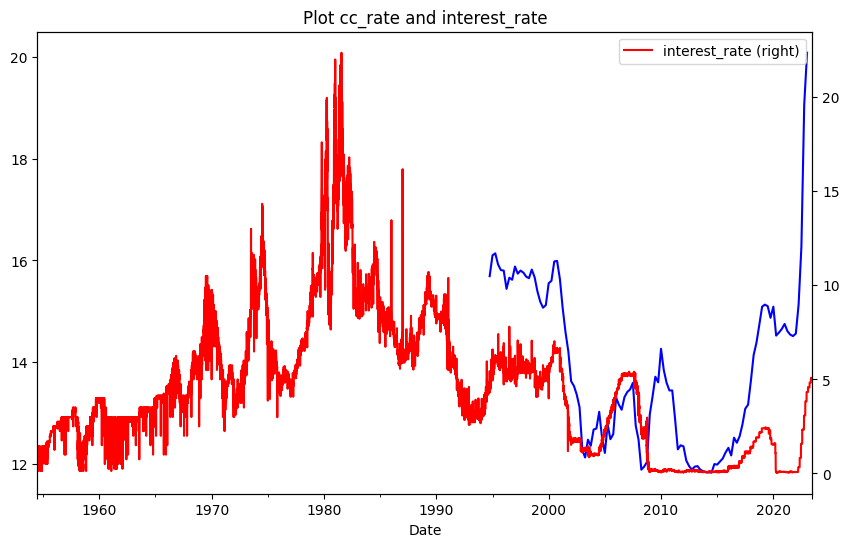

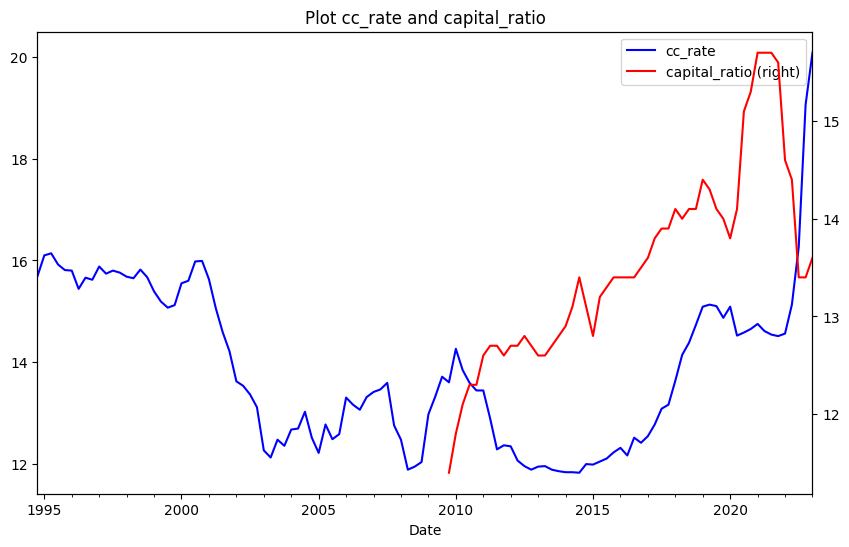

In [4]:
# plot two time series
proxyList = ['cc_rate']
# varList = ['interest_rate', 'cpi', 'unemployment', 'capital_ratio']
varList = ['interest_rate', 'capital_ratio']
df_merge.reset_index(inplace=True)
for proxy in proxyList:
    for var in varList:
        fig, ax = plt.subplots(figsize=(10,6))
#         df_plot = df_merge[[proxy, var]]
#         df_plot = df_plot.dropna()
        df_merge.dropna(subset=[proxy]).plot(x='Date', y=proxy, ax=ax, color='Blue')
        df_merge.dropna(subset=[var]).plot(x='Date', y=var, ax=ax, secondary_y=True, color='Red')
        ax.set_title('Plot %s and %s' % (proxy, var));

Graph 1: The blue line is the credit card rate while the red line is the FED interest rate level. Similar trend holds for the both time series since the 1990s. <br/>
Graph 2: The blue line is the credit card rate while the red line is Tier 1 capital-to-asset ratio requirement. Trends of both series was quite alike during the period from 2015 to 2019. However, while the capital ratio starts to climb in 2020, there is not much adjustment from the credit card rate but only increases later in 2022 mainly due to the increase of interest rate.

## **Scenerio 5**

In [5]:
# data of 10 year treasury bond and mortgage rates of last 10 years
end_date = datetime.date(2023,3,31)
start_date = datetime.date(2013,4,1)
# data source - FRED
dataSource = "fred"
# ticket for 10 year treasury bond and mortgage rate
Treasury_10year_BondYeild = 'DGS10'
mortgage_yeild = "MORTGAGE30US"
# reading data with DataReader from pandas
bond_df = pdr.DataReader(Treasury_10year_BondYeild,data_source=dataSource,start=start_date,end=end_date)
mortgage_df = pdr.DataReader(mortgage_yeild,data_source=dataSource,start=start_date,end=end_date)
#mortgage_df.rename(columns = {' value':'10year Treasury Bond Yeild'}, inplace = True)
mortgage_df.reset_index(inplace=True)
mortgage_df["timestamp"] =pd.to_datetime(mortgage_df['DATE'], format='%Y-%m-%d')
mortgage_df.rename(columns = {'MORTGAGE30US':'30year Mortgage Yeild'}, inplace = True)
mortgage_df.drop(columns=["DATE"],inplace=True)
mortgage_df = mortgage_df.set_index("timestamp")
mortgage_df.head()


30year Mortgage Yeild
timestamp                        
2013-04-04                   3.54
2013-04-11                   3.43
2013-04-18                   3.41
2013-04-25                   3.40
2013-05-02                   3.35

In [6]:
# Data infomations
bond_df.info()
mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2013-04-01 to 2023-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   2503 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2013-04-04 to 2023-03-30
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   30year Mortgage Yeild  522 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [7]:
# Reading data from csv files
# inflation rate of USA
# Treasury bond yield
# GDP growth rate of USA

## And cleaning the data for our use
inflation_df = pd.read_csv("/content/united-states-inflation-rate-cpi.csv")
inflation_df["timestamp"] =pd.to_datetime(inflation_df['date'], format='%Y-%m-%d')
inflation_df = inflation_df.set_index("timestamp")
inflation_df.drop(columns=["date"," Annual Change "],inplace=True)
treasurybond_yield_df = pd.read_csv("/content/10-year-treasury-bond-rate-yield-chart.csv")
treasurybond_yield_df["timestamp"] =pd.to_datetime(treasurybond_yield_df['date'], format='%Y-%m-%d')
treasurybond_yield_df = treasurybond_yield_df.set_index("timestamp")
treasurybond_yield_df.drop(columns=["date"],inplace=True)
treasurybond_yield_df.rename(columns = {' value':'10year Treasury Bond Yeild'}, inplace = True)

gdp_df = pd.read_csv("/content/united-states-gdp-growth-rate.csv")
gdp_df["timestamp"] =pd.to_datetime(gdp_df['date'], format='%Y-%m-%d')
gdp_df = gdp_df.set_index("timestamp")
gdp_df.drop(columns=["date"," Annual Change "],inplace=True)
treasurybond_yield_df.head()

10year Treasury Bond Yeild
timestamp                             
1962-01-02                        4.06
1962-01-03                        4.03
1962-01-04                        3.99
1962-01-05                        4.02
1962-01-08                        4.03

In [8]:
# gdp_df.info()
# inflation_df.info()
# df = pd.concat([gdp_df,inflation_df])
# df.info()
# df
#treasurybond_yield_df.info( )
corr_matrix = {
"inflaction_bond_corr" : inflation_df[' Inflation Rate (%)'].corr(treasurybond_yield_df["10year Treasury Bond Yeild"]),
"gdp_bond_corr" : gdp_df[" GDP Growth (%)"].corr(treasurybond_yield_df["10year Treasury Bond Yeild"]),
"inflaction_mortgage_df" : inflation_df[' Inflation Rate (%)'].corr(mortgage_df["30year Mortgage Yeild"]),
"gdp_mortgage_df" : gdp_df[' GDP Growth (%)'].corr(mortgage_df["30year Mortgage Yeild"]),
"mortgage_bond_df" : mortgage_df["30year Mortgage Yeild"].corr(treasurybond_yield_df["10year Treasury Bond Yeild"])
}
pp.pprint(corr_matrix)

{   'gdp_bond_corr': 0.031366356722038344,
    'gdp_mortgage_df': 0.9996507016799715,
    'inflaction_bond_corr': 0.7305220338254347,
    'inflaction_mortgage_df': -0.35899209486940326,
    'mortgage_bond_df': 0.9094106312247959}


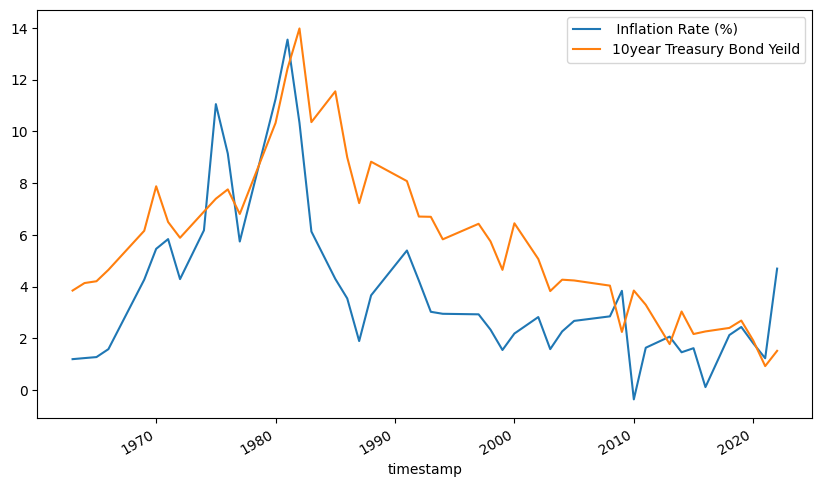

In [9]:
df = pd.merge(inflation_df, treasurybond_yield_df, left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(10,6))
df.plot(ax=ax);

In [10]:
df1 = pd.merge(gdp_df, mortgage_df, left_index=True, right_index=True)


In [11]:
df1.head()

GDP Growth (%)  30year Mortgage Yeild
timestamp                                         
2014-12-31           2.2878                   3.87
2015-12-31           2.7064                   4.01
2020-12-31          -2.7678                   2.67

In [12]:
df1[" GDP Growth (%)"].std()

3.0468886578497307

In [13]:
df1["30year Mortgage Yeild"].std()

0.736568620926342

volatality of GDP growth rate is much more higher than yeild rate of 30 year mortgage bonds.